In [12]:
import numpy as np
import pandas as pd


#data=pd.read_csv(r'Customer-Churn.csv',,skipinitialspace=True)
#data=data.sample(1000)
#data.head
#均值
m_mean=data['MonthlyCharges'].mean()
#标准差
m_std=data['MonthlyCharges'].std()
#中位数
m_mid=data['MonthlyCharges'].median()
#众数,连续型特征很少计算众数
m_m=data['MonthlyCharges'].mode()
#分类变量
data['MonthlyCharges'].value_counts()
#分位数
data['MonthlyCharges'].quantile([0.00,0.25,0.50,0.75])
#极差=最大值减去最小值
data['MonthlyCharges'].max()-data['MonthlyCharges'].min()
#四分位差
data['MonthlyCharges'].quantile(0.75)-data['MonthlyCharges'].quantile(0.25)
#方差=标准差^2
#变异系数=标准差/均值
cv=data['MonthlyCharges'].std()/data['MonthlyCharges'].mean()
cv
#点估计:用样本统计量估计总体参数，抽样平均身高为168=>总体平均身高也为168


from scipy import stats
#区间估计，提供置信区间和保证程度（置信度）
#有95%的可能性确定总体增长率在[4.5%,5.5%]之间，95%表示置信度，区间表示置信区间
se=stats.sem(data['MonthlyCharges'])
n=len(data['MonthlyCharges'])
#标准误
sf=data['MonthlyCharges'].std()/np.sqrt(n)
#置信区间
interval=stats.norm.interval(0.95,data['MonthlyCharges'].mean(),se)
data['MonthlyCharges'].mean()-1.96*se

#样本均值近似正态分布，中心极限定理

62.35014590147543

In [13]:
#假设检验
#当抽样均值距离总体均值u越近时，抽样结果出现概率越大，反之相反
#步骤
#提出原假设和备择假设
#确定适当的检验统计量
#设定显著性水平
#计算检验统计量的值
#做出决策

#单样本t检验
#假设样本服从t分布，原假设为总体均值等于u0
#备注假设为总体均值不等于u0
#先计算样本均值x，样本标准差q
# t=(x-u0)/(q/sqrt(n))
#根据公式计算结果p，判断是否拒绝原假设
d_mean=data['MonthlyCharges'].mean()
import statsmodels.api as sm
d1=sm.stats.DescrStatsW(data['MonthlyCharges'])
d1.ttest_mean(d_mean)
#(a,b,c)其中c为样本的自由度=数量-1




#双样本t检验,主要看pvalue
m_a=data.groupby(by='gender').mean()['MonthlyCharges']
m_a
gender0=data[data['gender']=='Female']['MonthlyCharges']
gender1=data[data['gender']=='Male']['MonthlyCharges']
levelTest=stats.levene(gender0,gender1)
levelTest
stats.stats.ttest_ind(gender0,gender1,equal_var=True)


(62.35017985163431, 66.04532014836569)

In [32]:
#卡方检验：主要用于分析两个分类变量之间的关系
#只能预测两个变量是否相关，不能表示强弱关系
#两个分类变量，其中有一个变量必须是二分类，不能都是多分类
cross_tab=pd.crosstab(data.PaymentMethod,data.gender,margins=True)
cross_tab
from scipy import stats
print(stats.chi2_contingency(cross_tab))
pd.crosstab(data.PaymentMethod,data.gender,normalize='index')


(1.9015081051782328, 0.9838838577705586, 8, array([[ 106.981,  110.019,  217.   ],
       [  97.121,   99.879,  197.   ],
       [ 165.155,  169.845,  335.   ],
       [ 123.743,  127.257,  251.   ],
       [ 493.   ,  507.   , 1000.   ]]))


gender,Female,Male
PaymentMethod,,
Bank transfer (automatic),0.516129,0.483871
Credit card (automatic),0.451777,0.548223
Electronic check,0.501493,0.498507
Mailed check,0.494024,0.505976


In [40]:
#方差分析：用于检验多个样本的均值是否有显著性差异，
#用于分析多于两个分类的离散型变量与连续型变量的关系
#例如不同教育程度水平对收入是否有显著性影响

#单因素方差分析：
#衡量不同因素对观测变化的影响程度，不同因素可以理解为一个变量取不同值时对观测变量的影响
#例如收入水平是否受教育程度的影响
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
model=ols('MonthlyCharges~C(gender)+C(tenure)+C(Contract)',data=data.dropna()).fit()
anova_lm(model)

data[['MonthlyCharges','tenure']].groupby('tenure').mean()
#多因素方差分析：
#考虑的是多个分类变量对连续变量的影响，以及分类变量之间的交互效应，
#例如在考虑股票收益率与行业和地区之间的关系，还要考虑行业和地区的交互雄效应



,df,sum_sq,mean_sq,F,PR(>F)
C(gender),1.0,425.163208,425.163208,0.586000,4.441652e-01
C(tenure),71.0,120804.749741,1701.475348,2.345135,1.183953e-08
C(Contract),2.0,95361.286185,47680.643092,65.718001,2.056244e-27
Residual,925.0,671118.938303,725.533987,NaN,NaN


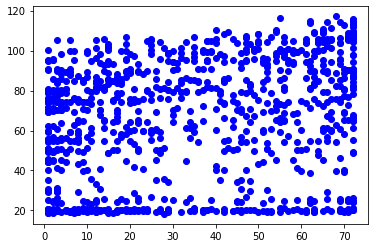

,tenure_r,MonthlyCharges_r
tenure_r,1.000000,0.281572
MonthlyCharges_r,0.281572,1.000000


In [62]:
#相关分析
#Pearson相关系数:衡量两变量线性相关关系
#公式=分子为：协方差；/分母为：两变量的标准差相乘
import matplotlib.pyplot as plt
plt.scatter(x=data['tenure'],y=data['MonthlyCharges'],c='blue')
plt.show()

corr_pear=data[['tenure','MonthlyCharges']].corr(method='pearson')
corr_pear


#Sperman 相关系数：适用于有序变量
#将变量排序，将原始数据转换为等级数据，即排序位置
#两个变量，每一组的值对应的等级差为d
#分母中的n为样本量
#p=1-6(E(di^2))/n(n^2-1)
corr_sperman=data[['tenure','MonthlyCharges']].corr(method='spearman')
corr_sperman.loc(['tenure','MonthlyCharges'])


#Kendall相关系数：用于衡量两个变量的非线性关系
corr_kindall=data[['tenure','MonthlyCharges']].corr(method='kendall')
corr_kindall

#分等级,数值越大排名越后
data['MonthlyCharges'].rank()
data['MonthlyCharges_r']=data['MonthlyCharges'].rank()
data['tenure_r']=data['tenure'].rank()
data[['MonthlyCharges','MonthlyCharges_r']]
#分级后的pearson系数
data[['tenure_r','MonthlyCharges_r']].corr(method='pearson')

In [63]:
#未分级的pearson系数
corr_pear=data[['tenure','MonthlyCharges']].corr(method='pearson')
corr_pear

,tenure,MonthlyCharges
tenure,1.000000,0.255627
MonthlyCharges,0.255627,1.000000


In [65]:
#等于分级后计算的pearson系数
corr_sperman.loc['tenure','MonthlyCharges']

0.2815720077857264